In [1]:
import pandas as pd
import numpy as np

In [2]:
# Загрузить данные с помощью pandas в объект типа DataFrame
data = pd.read_csv('MarketingSpend.csv', header = 0, names = ['Date', 'Offline', 'Online'])

(data.iloc[0]) # обращение по индексу к данным в строке

Date       2017-01-01
Offline          4500
Online         2424.5
Name: 0, dtype: object

In [3]:
data['Offline'] # обращение по имени столбца

0      4500
1      4500
2      4500
3      4500
4      4500
       ... 
360    4000
361    4000
362    4000
363    4000
364    4000
Name: Offline, Length: 365, dtype: int64

Задание 1.1. Для offline spend и для online spend: среднее, макс, мин, среднее квадратичное отклонение, дисперсия.

In [4]:
print(f"Среднее. Online продажи: {round(data['Online'].mean(), 3)}")

Среднее. Online продажи: 1905.881


In [5]:
print(f"Среднее. Offline продажи: {round(data['Offline'].mean(), 3)}")

Среднее. Offline продажи: 2843.562


Максимум и минимум:

In [6]:
print(data['Offline'].max())
print(data['Offline'].min())

5000
500


In [7]:
print(data['Online'].max())
print(data['Online'].min())

4556.93
320.25


Дисперсия

In [8]:
print(f"{data['Online'].var():.3f}")
print(f"{data['Offline'].var():.3f}")

654249.409
906860.906


Среднее квадратичное отклонение

In [9]:
print(f"{data['Online'].std():.3f}")
print(f"{data['Offline'].std():.3f}")

assert data['Online'].std()**2 == data['Online'].var(), 'с.к.о. ≠ дисп'

808.857
952.292


Задание 1.1 пункт 2. Создать диаграмму распределения случайной величины для online 
и offline spend., нанеся на нее пунктирно значения квартилей

Matplotlib is building the font cache; this may take a moment.


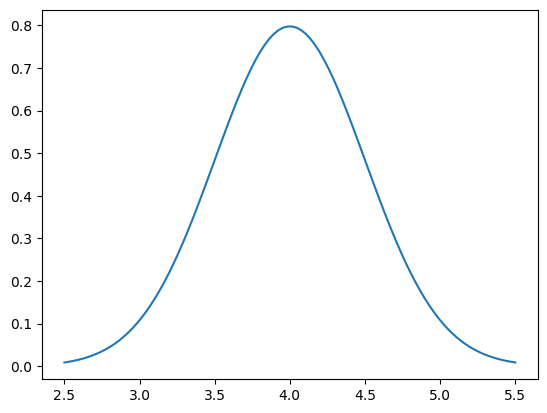

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt

mu = 4 # mean
sigma = 0.5 # standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Задание 1.2 Для датасета Retail.csv

In [11]:
data1 = pd.read_csv('Retail.csv')

data1.sample(10)

,InvoiceNo,InvoiceDate,StockCode,Quantity
166645,576618,2017-12-14,21722,1
37768,544186,2017-03-15,20677,113
82242,554906,2017-06-26,21293,1
56272,548167,2017-04-28,22059,2
86579,555948,2017-07-07,21326,1
90911,557119,2017-07-15,21670,1
91380,557275,2017-07-18,20675,28
88873,556503,2017-07-12,21481,5
103715,560225,2017-08-14,21096,2
39956,544661,2017-03-21,22120,1


1.2.1. Количество инвойсов всего.

In [12]:
len(data1['InvoiceNo'])

181247

In [13]:
len(data1['InvoiceNo'].value_counts())

16522

сколько всего позиций товаров заказали

In [30]:
len(data1['Quantity'].value_counts())

149

Топ-10 stockcodes, которых заказали наибольшее число раз. 

In [16]:
data1['StockCode'].value_counts().head(10)

StockCode
20725    1549
22197    1357
21212    1325
20727    1281
21931    1162
20728    1145
22086    1083
15056    1070
20724    1022
20726    1009
Name: count, dtype: int64

Задание 1.2. Для файла MarketingSpend.csv график должен изображать зависимость значений суммы онлайн и оффлайн-продаж для каждого месяца. Тип графика - столбчатый, где группы по месяцам расположены по вертикали как на изображении ниже, данные по онлайн и оффлайн-продажам находятся рядом друг с другом (цветовое кодирование - на усмотрение студента). 

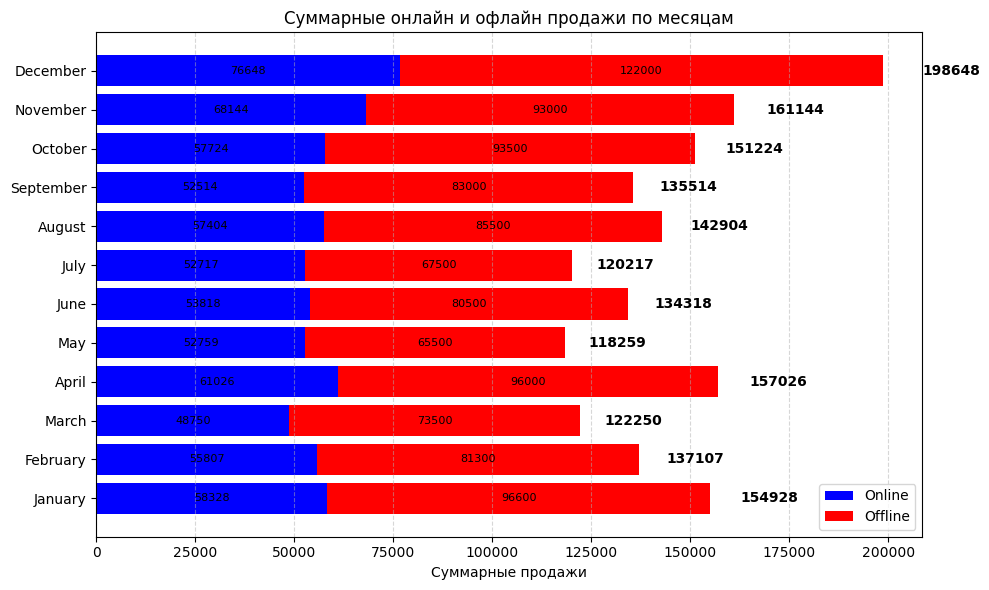

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Загрузить данные с помощью pandas в объект типа DataFrame
data = pd.read_csv('MarketingSpend.csv', header = 0, names = ['Date', 'Offline', 'Online'])

data['Date'] = pd.to_datetime(data['Date'])  #преобразуем в datetime

# Извлекаем название месяца
data['Month'] = data['Date'].dt.strftime('%B')

# Группировка по месяцу
monthly = data.groupby('Month')[['Online', 'Offline']].sum()

# Упорядочим месяцы
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly = monthly.reindex([m for m in month_order if m in monthly.index])

# Данные для графика
online = monthly['Online']
offline = monthly['Offline']
totals = online + offline
ind = np.arange(len(monthly))

# Построение горизонтального графика
plt.figure(figsize=(10, 6))
bar1 = plt.barh(ind, online, color='blue', label='Online')
bar2 = plt.barh(ind, offline, left=online, color='red', label='Offline')

# Подписи внутри баров и сумма слева
for i in range(len(ind)):
    plt.text(online.iloc[i] / 2, ind[i], f'{int(online.iloc[i])}', va='center', ha='center', fontsize=8, color='black')
    plt.text(online.iloc[i] + offline.iloc[i] / 2, ind[i], f'{int(offline.iloc[i])}', va='center', ha='center', fontsize=8, color='black')
    plt.text(totals.iloc[i] * 1.05, ind[i], f'{int(totals.iloc[i])}', va='center', ha='left', fontsize=10, fontweight='bold')
    
# Оформление графика
plt.yticks(ind, monthly.index)
plt.xlabel('Суммарные продажи')
plt.title('Суммарные онлайн и офлайн продажи по месяцам')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Для файла Retail.csv график должен изображать график рассеяния (scatterplot) количества проданных изделий (StockCode) за каждый день.
Для визуализации данные за каждый день должны быть предварительно суммированы. На графике должны присутствовать подписи для осей, метки с соответствующим шагом (выберите его самостоятельно),
цвет точек и остальные параметры - по усмотрению студента. Подписи для меток для оси x можно обозначить как день года (от 1 до 365).

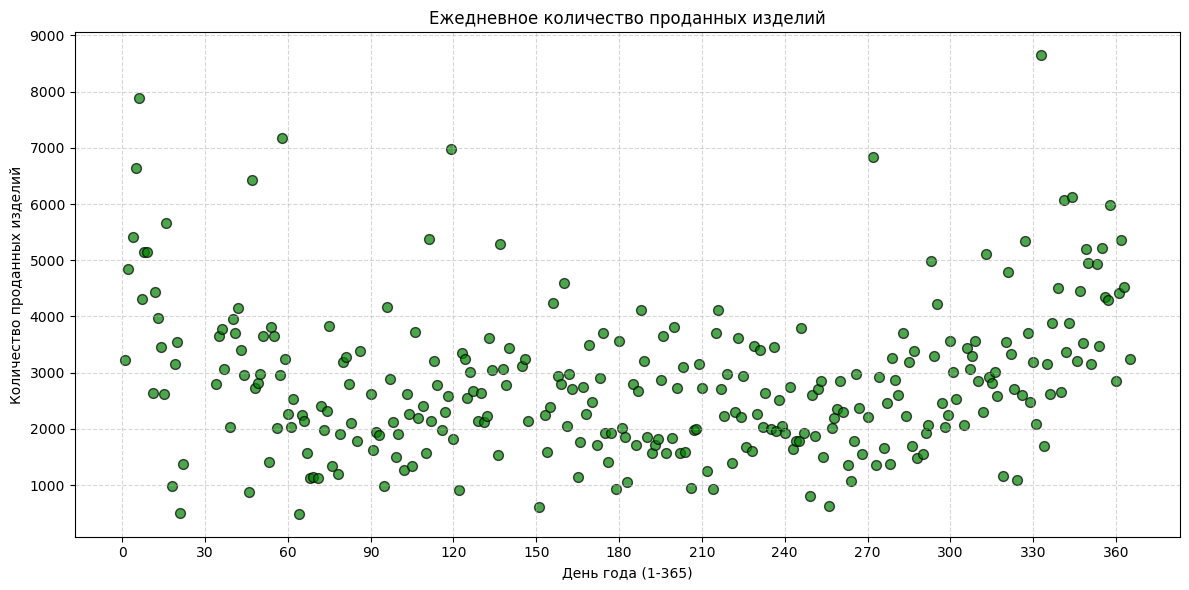

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Retail.csv')

# Преобразуем в datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Извлечем день года (1-365)
data['DayOfYear'] = data['InvoiceDate'].dt.dayofyear
daily_sales = data.groupby('DayOfYear')['Quantity'].sum()

# Построение scatter plot
plt.figure(figsize=(12,6))
plt.scatter(daily_sales.index, daily_sales.values, color='green', alpha=0.7, edgecolors='black', s=50)

# Оформление осей
plt.xlabel('День года (1-365)')
plt.ylabel('Количество проданных изделий')
plt.title('Ежедневное количество проданных изделий')

# Настроим шаг меток по оси X — например, через каждые 30 дней
plt.xticks(range(0, 366, 30))

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()